In [2]:
from dolfin import *
from ufl import as_ufl
import mshr as mr

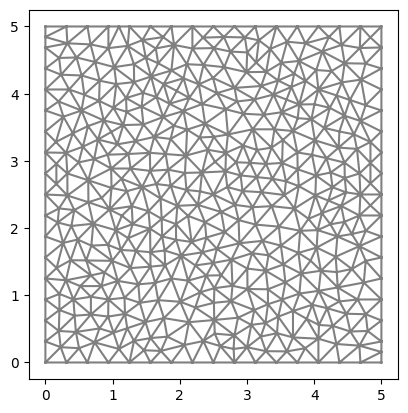

In [3]:
rectangle = mr.Rectangle(Point(0,0), Point(5,5))
mesh = mr.generate_mesh(rectangle, 16)
plot(mesh)

In [4]:
# 定义设计变量
theta = Expression('x[0]*x[0]+x[1]*x[1]', degree=1)

f_visual type: <class 'dolfin.function.function.Function'>


AttributeError: 'dolfin.cpp.fem.FiniteElement' object has no attribute 'interpolate'

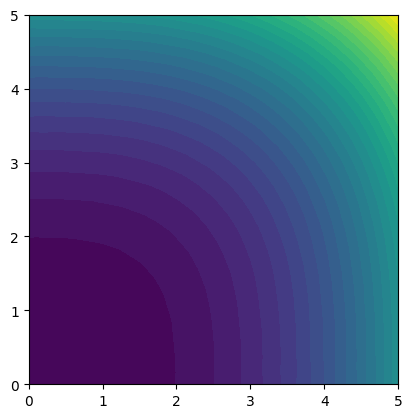

In [5]:
# 创建一个FunctionSpace
V = FunctionSpace(mesh, 'CG', 1)

# 定义一个测试函数
phi = TestFunction(V)

# 定义一个原始函数
f = Expression('x[0]*x[0]*x[0] + x[1]*x[1]*x[1]', degree=1)
f_visual = project(f, V)
print("f_visual type:", type(f_visual))
plot(f_visual)

# 首先通过项目获取表达式
f_expr = f_visual.function_space().element().interpolate(f)

# 创建一个Form对象，表示在单元域K上的积分!
form = Form(f * phi * dx)
# 打印Form对象的类型
print("Form type:", type(form))
# 打印Form对象的内容
print("Form:", form)

In [ ]:
# 获取 SpatialCoordinate
x = SpatialCoordinate(mesh)

# 计算 integrand 的导数
integrand_derivative = diff(f_visual, x)

# 重新构建 Form
form_derivative = integrand_derivative * dx

# 打印结果
print(form_derivative)

In [ ]:
from dolfin import *

# 创建网格和函数空间
mesh = UnitSquareMesh(16, 16)
V = FunctionSpace(mesh, 'CG', 1)

# 定义并初始化一个函数 f
f = Function(V)
f.interpolate(Expression('x[0]*x[0]*x[0] + x[1]*x[1]*x[1]', degree=1))

# 计算 f 对 y 的偏导数 (即对 x[1] 的偏导数)
df_dy = project(f.dx(1), V)

# 可视化原始函数和偏导数
import matplotlib.pyplot as plt

plt.figure()
# plot(f, title="Original function f")

plt.figure()
plot(df_dy, title="Partial derivative of f with respect to y (x[1])")

plt.show()

In [ ]:
import show_vector_with_pyvista as show

# show.show_vector_with_pyvista("output/")
grid = show.show_vector_with_pyvista("output/theta_vector_adam.txt")


In [ ]:
import pyvista as pv
streamlines = grid.streamlines('vectors', n_points=200, max_time=1.0)
plotter = pv.Plotter()
plotter.add_mesh(streamlines, color="red")
plotter.show()

In [ ]:
import logging
import sys
logging.basicConfig(stream=sys.stderr,
                    level=logging.DEBUG,
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("这是一个info")
logging.error("这是一个error")
logging.warning("这是一个warning")
logging.debug("这是一个debug信息")

In [ ]:
# import logging
# import sys
# import os

# # 创建日志记录器
# logger = logging.getLogger()
# logger.setLevel(logging.INFO)

# # 创建处理器 - 控制台输出
# console_handler = logging.StreamHandler(sys.stdout)
# console_handler.setLevel(logging.INFO)

# # 创建处理器 - 文件输出
# log_filename = 'output/custom_log.log'
# os.makedirs(os.path.dirname(log_filename), exist_ok=True)  # 确保目录存在
# file_handler = logging.FileHandler(log_filename)
# file_handler.setLevel(logging.INFO)

# # 正确的格式器
# formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
# console_handler.setFormatter(formatter)
# file_handler.setFormatter(formatter)

# # 将处理器添加到日志记录器
# logger.addHandler(console_handler)
# logger.addHandler(file_handler)

# # 示例日志信息
# logger.info("This is an info log message.")
# logger.error("This is an error log message.")

In [ ]:



# svf = sv.ShowVectorWithPyvista("output/theta_vector(adam).txt")
# svf.show_vector_field()
import pyvista as pv
import pyvista.examples as ex

mesh = ex.load_airplane()
plot = pv.Plotter()
plot.add_mesh(mesh)
plot.show()


In [ ]:
#在最前面
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


import show_vector_with_pyvista as sv
fv = sv.ShowVectorWithPyvista("output/theta_vector(adam).txt")

# 打印前5个面的顶点坐标
# for i, face in enumerate(fv.faces[:5]):
#     face_vertices = fv.vertices[face]
#     print(f"Face {i+1} vertices:\n", face_vertices)

# # 打印前5个面的中点坐标
# print("Midpoints for first 5 faces:", fv.midpoints[:5])

# print("DEBUG")
fv.show_vector_field(scalar=0.2)

In [ ]:
# 定义流线的起始点
# 这里选择了一些 midpoints 作为起始点，可以根据需要调整
start_points = fv.midpoints

In [ ]:
import pyvista as pv
import numpy as np

def simple_streamline_example():
    # 创建一个简单的3D网格
    grid = pv.ImageData(dims=(20, 20, 20), spacing=(1, 1, 1))

    # 生成一个简单的向量场
    x, y, z = np.meshgrid(np.linspace(-10, 10, 20),
                          np.linspace(-10, 10, 20),
                          np.linspace(-10, 10, 20), indexing='ij')
    
    u = y
    v = x
    w = np.zeros_like(z)
    vectors = np.stack((u, v, w), axis=-1).reshape(-1, 3)
    
    # 将向量场添加到网格
    grid['vectors'] = vectors

    # 绘制流线图
    streamlines, src = grid.streamlines('vectors', return_source=True,
                                        n_points=100, max_time=100, initial_step_length=2)
    
    # 使用 PyVista 绘制流线
    plotter = pv.Plotter()
    plotter.add_mesh(grid.outline(), color='k')
    plotter.add_mesh(streamlines.tube(radius=0.1), color='blue')
    plotter.show()

simple_streamline_example()

In [ ]:
import pyvista as pv
import numpy as np

import show_vector_with_pyvista as sv
fv = sv.ShowVectorWithPyvista("output/theta_vector(adam).txt")

def show_streamlines(data:sv, **options):
    """
    使用当前类的数据生成和显示流线。

    参数:
    **options : dict
        动态选项参数，包括是否显示网格、标题、标量条等。
        可选参数:
        - show_grid: bool, 是否显示网格，默认值为 True。
        - title: str, 图表的标题，默认值为 "Streamlines Visualization"。
        - show_scalar_bar: bool, 是否显示标量条，默认值为 False。
    """
    show_grid = options.get('show_grid', True)
    title = options.get('title', "Streamlines Visualization")
    show_scalar_bar = options.get('show_scalar_bar', False)

    # 创建 PyVista PolyData 对象
    grid_faces = np.insert(data.faces, 0, 3, axis=1)
    grid = pv.PolyData(data.vertices, grid_faces)
    
    # 添加向量场到网格
    grid['vectors'] = np.array(data.vector_field)

    # 使用随机起点生成流线
    streamlines, src = grid.streamlines(
        'vectors',
        return_source=True,
        n_points=100,
        max_time=100,
        initial_step_length=2
    )

    # 创建绘图器并显示流线
    plotter = pv.Plotter()
    plotter.add_mesh(grid.outline(), color="k")
    plotter.add_mesh(streamlines.tube(radius=0.1), color='blue')

    if show_grid:
        plotter.add_mesh(grid, show_edges=True, opacity=0.2)
    
    if show_scalar_bar:
        plotter.add_scalar_bar("Streamline Magnitude")

    plotter.add_title(title)
    plotter.show()

show_streamlines(fv)

In [ ]:
import pyvista as pv
import numpy as np

import pyvista.examples as examples
ex_mesh = examples.download_kitchen(split=True)

nx = 20
ny = 15
nz = 5

origin = (-(nx - 1) * 0.1 / 2, -(ny - 1) * 0.1 / 2, -(nz - 1) * 0.1 / 2)
mesh = pv.ImageData(dimensions=(nx, ny, nz), spacing=(0.1, 0.1, 0.1), origin=origin)
x = mesh.points[:, 0]
y = mesh.points[:, 1]
z = mesh.points[:, 2]
vectors = np.empty((mesh.n_points, 3))
vectors[:, 0] = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
vectors[:, 1] = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
vectors[:, 2] = np.sqrt(3.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) * np.sin(np.pi * z)

mesh['vectors'] = vectors
stream, src = mesh.streamlines(
    'vectors',
    return_source=True,
    terminal_speed=0.0,
    n_points=200,
    source_radius=0.1,
)
cpos = [(1.2, 1.2, 1.2), (-0.0, -0.0, -0.0), (0.0, 0.0, 1.0)]
stream.tube(radius=0.0005).plot(cpos=cpos)

In [ ]:
import pyvista as pv
import numpy as np

import pyvista.examples as examples

from __future__ import annotations

mesh = examples.download_cylinder_crossflow()
fluid_mesh = mesh[0]
# print(fluid_mesh)

p = pv.Plotter()
p.add_mesh(fluid_mesh, show_edges=True)
# p.show()

one_streamline = fluid_mesh.streamlines(
    start_position=(0.0, 0.4, 0.0),
    max_time=100.0,
    compute_vorticity=False,  # vorticity already exists in dataset
)

clim = [0, 20]
camera_position = [(7, 0, 20.0), (7, 0.0, 0.0), (0.0, 1.0, 0.0)]

print()

# p = pv.Plotter()
for i in range(1, len(mesh)):
    p.add_mesh(mesh[i], color='k')
p.add_mesh(one_streamline.tube(radius=0.02),  clim=clim)
p.view_xy()
p.show(cpos=camera_position)

In [ ]:
line_streamlines = fluid_mesh.streamlines(
    pointa=(0, -5, 0),
    pointb=(0, 5, 0),
    n_points=50,
    max_time=100.0,
    compute_vorticity=False,  # vorticity already exists in dataset
)

p = pv.Plotter()
for i in range(1, len(mesh)):
    p.add_mesh(mesh[i], color='black')
p.add_mesh(line_streamlines.tube(radius=0.01), scalars="vorticity_mag", clim=clim)
p.view_xy()
p.show(cpos=camera_position)

In [ ]:
import show_vector_with_pyvista as sv
sv = sv.ShowVectorWithPyvista("output/theta_vector(adam).txt")
sv.test_show_grid()

In [ ]:
import pyvista as pv
import numpy as np

# 定义单元格、单元类型和点
cells = [4, 0, 1, 2, 3]
celltypes = [pv.CellType.TETRA]
points = [
    [1.0, 1.0, 1.0],
    [1.0, -1.0, -1.0],
    [-1.0, 1.0, -1.0],
    [-1.0, -1.0, 1.0],
]

# 创建 UnstructuredGrid 对象
grid = pv.UnstructuredGrid(cells, celltypes, points)

# 创建与点数量相同的标量数据
scalars = np.array([10, 20, 30, 40], dtype=np.float32)

# 将标量数据添加到点数据中
grid.point_data["scalars"] = scalars
plotter = pv.Plotter()
plotter.enable_depth_peeling()  # 启用深度剥离以改进透明度渲染
plotter.enable_anti_aliasing()  # 启用抗锯齿
plotter.add_mesh(grid, scalars="scalars", cmap="coolwarm")

# 设置窗口分辨率
plotter.window_size=[800, 600]  # 显示时的窗口分辨率

# 导出高分辨率图像
# plotter.screenshot("high_res_image.png", window_size=[3840, 2160])  # 导出4K分辨率的图片
plotter.show()
# grid.plot(scalars="scalars", show_edges=False, cmap="coolwarm")

In [1]:
import pyvista as pv
import numpy as np

# 定义平面上四个三角形的节点坐标
points = np.array([
    [0, 0, 0],  # 节点 0
    [1, 0, 0],  # 节点 1
    [0, 1, 0],  # 节点 2
    [1, 1, 0],  # 节点 3
    [2, 0, 0],  # 节点 4
    [2, 1, 0]   # 节点 5
])

# 定义四个三角形单元的连接关系
cells = np.hstack([
    [3, 0, 1, 2],  # 三角形单元 1 (3个点: 0, 1, 2)
    [3, 1, 3, 2],  # 三角形单元 2 (3个点: 1, 3, 2)
    [3, 1, 4, 3],  # 三角形单元 3 (3个点: 1, 4, 3)
    [3, 4, 5, 3],  # 三角形单元 4 (3个点: 4, 5, 3)
])

# 每个单元的类型，这里是 VTK_TRIANGLE 对应三角形
cell_types = np.array([pv.CellType.TRIANGLE] * 4)

# 创建 UnstructuredGrid
grid = pv.UnstructuredGrid(cells, cell_types, points)

# 定义向量场 (假设简单的向量场)
vectors = np.array([
    [1, 0, 0],  # 节点 0 的向量
    [0, 1, 0],  # 节点 1 的向量
    [-1, 0, 0],  # 节点 2 的向量
    [0, -1, 0],  # 节点 3 的向量
    [1, 1, 0],  # 节点 4 的向量
    [-1, 1, 0]   # 节点 5 的向量
])

# 将向量场添加到网格
grid['vectors'] = vectors

# 增加密集的种子点来生成更密集的流线场
x, y = np.meshgrid(np.linspace(0.1, 1.9, 10), np.linspace(0.1, 0.9, 10))
seed_points = pv.PointSet(np.c_[x.ravel(), y.ravel(), np.zeros_like(x.ravel())])

# 通过向量场生成流线
streamlines = grid.streamlines_from_source(
    seed_points,
    vectors='vectors',  # 指定向量场的名称
    integration_direction='both',  # 流线的方向，'both'表示在正反两个方向上生成流线
    max_time=2.0,  # 控制流线的长度，值越大，流线越长
    max_steps=200,  # 流线生成的最大步数，步数越多，流线越长
    terminal_speed=1e-12,  # 当速度小于该值时，终止流线生成
    initial_step_length=0.01,  # 流线生成的初始步长
    max_step_length=0.01,  # 流线生成的最大步长，控制流线延展的最大步伐
    min_step_length=0.01,  # 流线生成的最小步长，控制流线延展的最小步伐
    step_unit='l'  # 步长的单位，'cl' 表示以单元长度为单位
)
print(streamlines)
point_data = streamlines.point_data.dataset
print(point_data)
# for name in point_data.keys():
#     print(name)

# 可视化
plotter = pv.Plotter()
plotter.add_mesh(grid, show_edges=True, color="lightblue")

# 将点渲染为球体，设置 render_points_as_spheres=True
plotter.add_points(points, color="red", point_size=20, render_points_as_spheres=True)

# 显示向量场
plotter.add_arrows(grid.points, grid['vectors'], mag=0.2)

# 显示流线，并将它们渲染为管线
plotter.add_mesh(streamlines.tube(radius=0.001), color='red')
plotter.view_xy()
plotter.show()

/home/wsl-20/anaconda3/envs/fenics-top-workspace/lib/python3.12/site-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
/home/wsl-20/anaconda3/envs/fenics-top-workspace/lib/python3.12/site-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


PolyData (0x7f4a4dc63ac0)
  N Cells:    200
  N Points:   16102
  N Strips:   0
  X Bounds:   5.791e-05, 2.000e+00
  Y Bounds:   2.090e-05, 1.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   8
PolyData (0x7f4a4dc63ac0)
  N Cells:    200
  N Points:   16102
  N Strips:   0
  X Bounds:   5.791e-05, 2.000e+00
  Y Bounds:   2.090e-05, 1.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   8


Widget(value='<iframe src="http://localhost:34577/index.html?ui=P_0x7f4a4dbe7530_0&reconnect=auto" class="pyvi…

In [1]:
from scipy.interpolate import splprep, splev
# 提取每条流线的数据
lines = streamlines.lines
points = streamlines.points

# 创建一个列表来存储所有的采样点
all_sampled_points = []

# 遍历每一条流线
num_lines = streamlines.n_lines
offset = 0
for i in range(num_lines):
    num_points_in_line = lines[offset]
    line_indices = lines[offset + 1: offset + 1 + num_points_in_line]
    line_points = points[line_indices]
    # print(f"流线 {i + 1}:")
    # print(line_points)
    # offset += num_points_in_line + 1

    # 对流线进行样条平滑
    tck, u = splprep(line_points.T, s=0)
    
    # # 根据样条参数化间隔0.1进行采样
    # sample_u = np.arange(0, 1.0, 0.1)
    # sampled_points = np.array(splev(sample_u, tck)).T


    # 根据样条曲线计算每段的弧长
    sample_u = np.linspace(0, 1, 1000)  # 生成足够多的样条参数以近似连续曲线
    spline_points = np.array(splev(sample_u, tck)).T
    distances = np.cumsum(np.r_[0, np.linalg.norm(np.diff(spline_points, axis=0), axis=1)])
    # 目标采样点间隔
    target_interval = 0.1

    # 使用目标间隔重新采样
    total_length = distances[-1]
    num_samples = int(total_length // target_interval) + 1  # +1保证包括终点
    new_distances = np.linspace(0, total_length, num_samples)

    # 确保插值点在有效范围内
    new_distances_clipped = np.clip(np.interp(new_distances, distances, sample_u), sample_u.min(), sample_u.max())
    sampled_points = np.array(splev(new_distances_clipped, tck)).T

    
    # 将采样点添加到列表中
    all_sampled_points.append(sampled_points)
    
    offset += num_points_in_line + 1

# 将所有采样点合并成一个数组
all_sampled_points = np.vstack(all_sampled_points)

# 可视化
plotter = pv.Plotter()
plotter.add_mesh(grid, show_edges=True, color="lightblue")

# 将点渲染为球体，设置 render_points_as_spheres=True
plotter.add_points(points, color="red", point_size=3, render_points_as_spheres=True)

# 显示向量场
plotter.add_arrows(grid.points, grid['vectors'], mag=0.2)

# 显示采样点，并将它们渲染为球体
plotter.add_points(all_sampled_points, color="blue", point_size=10, render_points_as_spheres=True)


# 显示流线，并将它们渲染为管线
# plotter.add_mesh(streamlines.tube(radius=0.001), color='red')
plotter.view_xy()
plotter.show()

NameError: name 'streamlines' is not defined